In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import Pipeline

In [16]:
df = pd.read_csv("3-customersatisfaction.csv")

In [17]:
df.head()

Unnamed: 0  Customer Satisfaction  Incentive
0           0              -1.282447   1.010513
1           1               0.425298   2.281043
2           2               1.953070   4.415053
3           3               2.625838  10.563600
4           4              -1.426333   0.627365

In [18]:
df.drop("Unnamed: 0", axis = 1, inplace=True)

In [19]:
df.head()

Customer Satisfaction  Incentive
0              -1.282447   1.010513
1               0.425298   2.281043
2               1.953070   4.415053
3               2.625838  10.563600
4              -1.426333   0.627365

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Customer Satisfaction  100 non-null    float64
 1   Incentive              100 non-null    float64
dtypes: float64(2)
memory usage: 1.7 KB


In [21]:
df.describe()

Customer Satisfaction   Incentive
count             100.000000  100.000000
mean               -0.005427    3.445220
std                 1.721792    2.911818
min                -2.992863   -1.068081
25%                -1.431357    1.471341
50%                 0.109167    2.748839
75%                 1.421119    4.739113
max                 2.986736   11.000056

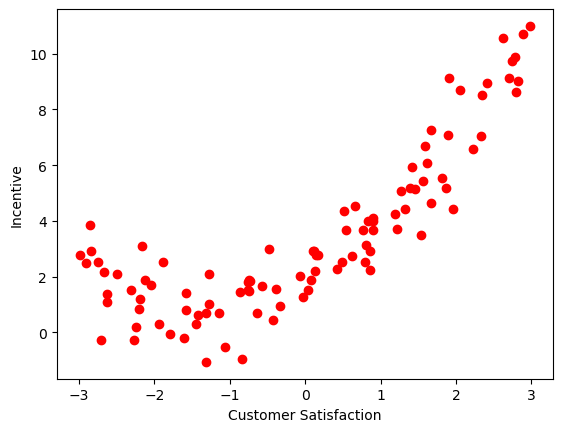

In [22]:
# iki column arasındaki ilişkiyi görmek için
plt.scatter(df["Customer Satisfaction"], df["Incentive"], color="r")
plt.xlabel("Customer Satisfaction")
plt.ylabel("Incentive")
plt.show()

In [23]:
# dependent & independent
X = df[["Customer Satisfaction"]]
y = df["Incentive"]

In [24]:
X.head()

Customer Satisfaction
0              -1.282447
1               0.425298
2               1.953070
3               2.625838
4              -1.426333

In [25]:
y.head()

0     1.010513
1     2.281043
2     4.415053
3    10.563600
4     0.627365
Name: Incentive, dtype: float64

In [27]:
# train - test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 15)

In [29]:
X_train

Customer Satisfaction
99               0.512504
3                2.625838
20              -0.865714
55              -1.145369
6                2.823460
..                    ...
28               1.191020
0               -1.282447
5               -1.311432
12               0.490521
72              -2.243889

[80 rows x 1 columns]

In [34]:
# scaler
scaler = StandardScaler()

In [35]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [36]:
regression = LinearRegression()

In [37]:
regression.fit(X_train, y_train)

LinearRegression()

In [39]:
# prediction
y_pred = regression.predict(X_test)

In [40]:
y_pred

array([ 4.65663741,  3.71913877,  1.64121789,  6.29646523,  3.46766736,
        5.7580845 ,  4.692485  ,  3.61616231,  5.62448003,  0.13472702,
        4.47909659,  4.8130839 ,  1.58319087,  0.30515983,  5.27634309,
        0.41711005, -0.7385295 , -0.32653914,  3.55906887,  1.19798631])

In [42]:
score = r2_score(y_test, y_pred)
print(score)

0.2705652535622246


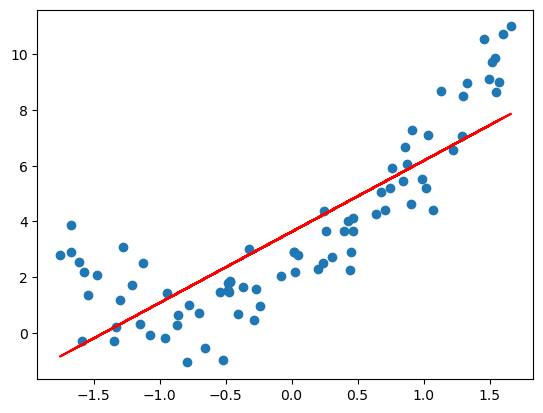

In [45]:
plt.scatter(X_train, y_train)
plt.plot(X_train, regression.predict(X_train), color = "r")
plt.show()

In [49]:
poly = PolynomialFeatures()

In [52]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [53]:
X_train_poly

array([[ 1.00000000e+00,  2.47633535e-01,  6.13223675e-02],
       [ 1.00000000e+00,  1.45565669e+00,  2.11893639e+00],
       [ 1.00000000e+00, -5.40182671e-01,  2.91797318e-01],
       [ 1.00000000e+00, -7.00039198e-01,  4.90054879e-01],
       [ 1.00000000e+00,  1.56862116e+00,  2.46057233e+00],
       [ 1.00000000e+00,  9.87568378e-01,  9.75291302e-01],
       [ 1.00000000e+00,  4.48640749e-01,  2.01278522e-01],
       [ 1.00000000e+00,  1.54377517e+00,  2.38324178e+00],
       [ 1.00000000e+00,  1.33219938e+00,  1.77475518e+00],
       [ 1.00000000e+00, -4.80410926e-01,  2.30794658e-01],
       [ 1.00000000e+00,  3.92892957e-01,  1.54364876e-01],
       [ 1.00000000e+00, -6.57456685e-01,  4.32249293e-01],
       [ 1.00000000e+00,  4.42663768e-01,  1.95951211e-01],
       [ 1.00000000e+00, -8.72131603e-01,  7.60613533e-01],
       [ 1.00000000e+00, -1.57257044e+00,  2.47297780e+00],
       [ 1.00000000e+00, -4.70184630e-01,  2.21073587e-01],
       [ 1.00000000e+00, -8.36083500e-02

In [54]:
regression =LinearRegression()
regression.fit(X_train_poly, y_train)

LinearRegression()

In [56]:
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.7685687698788558


In [57]:
regression.coef_

array([0.        , 2.63871762, 1.54959954])

In [60]:
regression.intercept_

np.float64(2.076676429793282)

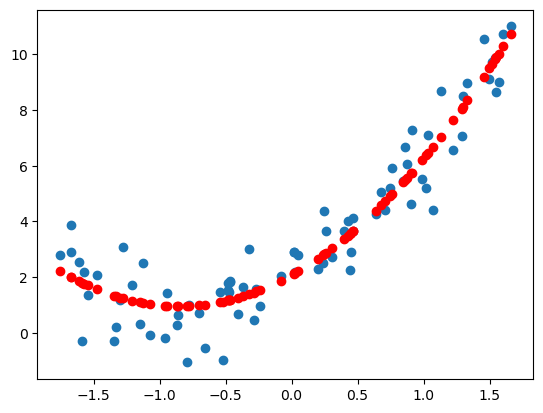

In [64]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color ="r")
plt.show()

In [81]:
poly = PolynomialFeatures(degree = 3, include_bias = True)

In [82]:
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

In [83]:
regression =LinearRegression()
regression.fit(X_train_poly, y_train)
y_pred = regression.predict(X_test_poly)
score = r2_score(y_test, y_pred)
print(score)

0.757344362140105


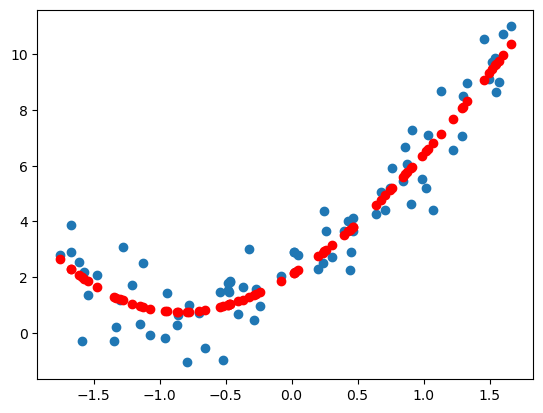

In [84]:
plt.scatter(X_train, y_train)
plt.scatter(X_train, regression.predict(X_train_poly), color ="r")
plt.show()

In [85]:
# new data

In [86]:
new_df = pd.read_csv("3-newdatas.csv")

In [87]:
new_df.head()

0
0 -3.000000
1 -2.969849
2 -2.939698
3 -2.909548
4 -2.879397

In [88]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       200 non-null    float64
dtypes: float64(1)
memory usage: 1.7 KB


In [90]:
new_df.rename(columns = {"0": "Customer Satisfaction"}, inplace = True)

In [91]:
new_df

Customer Satisfaction
0                -3.000000
1                -2.969849
2                -2.939698
3                -2.909548
4                -2.879397
..                     ...
195               2.879397
196               2.909548
197               2.939698
198               2.969849
199               3.000000

[200 rows x 1 columns]

In [96]:
X_new = new_df[["Customer Satisfaction"]]

In [98]:
X_new = scaler.fit_transform(X_new)

In [99]:
X_new_poly = poly.transform(X_new)

In [100]:
y_new = regression.predict(X_new_poly)

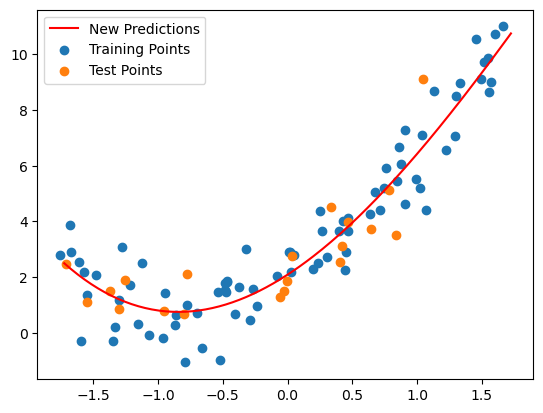

In [110]:
plt.plot(X_new,y_new, "r",label="New Predictions")
plt.scatter(X_train,y_train, label="Training Points")
plt.scatter(X_test, y_test, label = "Test Points")
plt.legend()
plt.show()

In [111]:
# pipeline

In [127]:
def poly_regression(degree):
    poly_features  = PolynomialFeatures(degree = degree)
    lin_reg = LinearRegression()
    scaler = StandardScaler()
    pipeline = Pipeline([
        ("poly_features", poly_features),
        ("lin_reg", lin_reg)
    ])
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print("R2 score: ", score)

    y_pred_new = pipeline.predict(X_new)
    plt.plot(X_new, y_pred_new, "r", label="New Predictions")
    plt.scatter(X_train, y_train, label = "Training Points")
    plt.scatter(X_test, y_test, label = "Test Points")
    plt.legend()
    plt.show()

R2 score:  0.2705652535622246


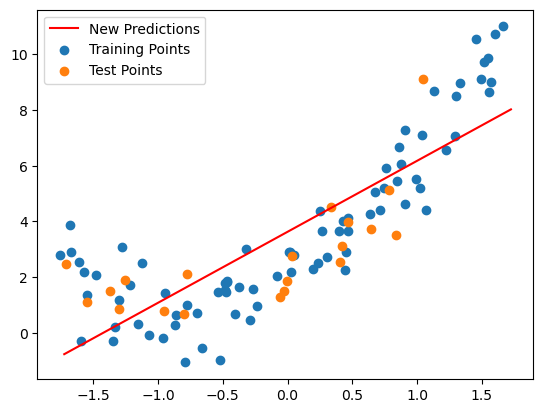

R2 score:  0.7685687698788558


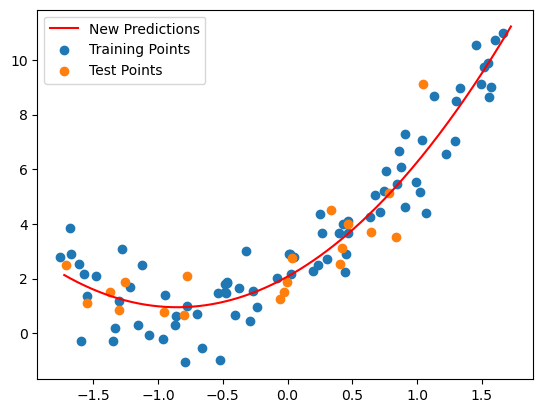

R2 score:  0.757344362140105


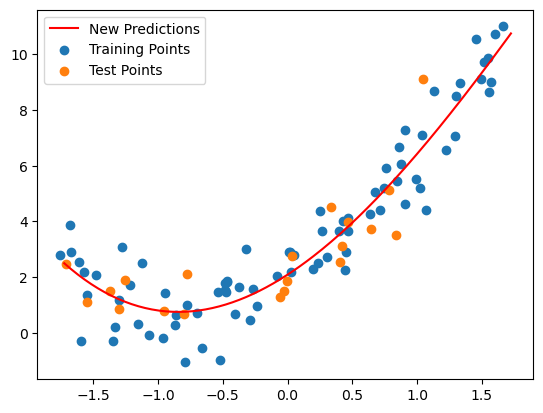

R2 score:  0.7355034443260413


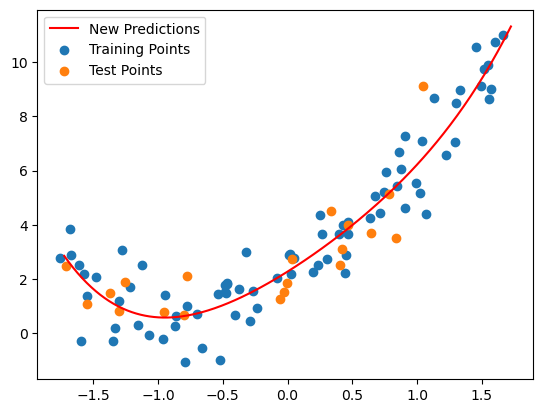

R2 score:  0.7351244165095399


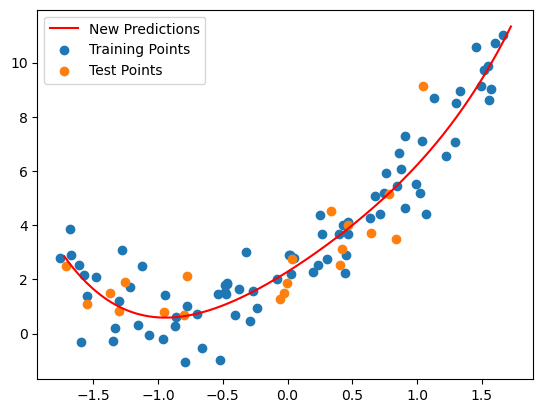

R2 score:  0.7343590482133429


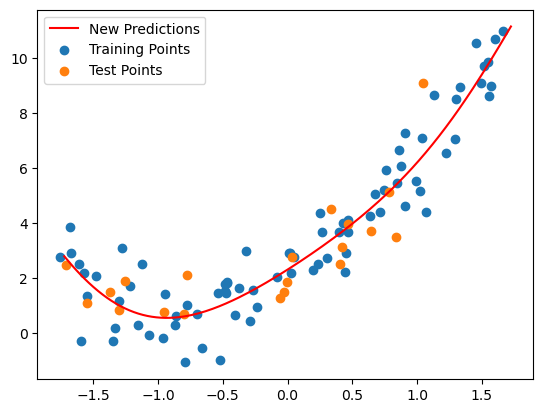

R2 score:  0.7347819263549453


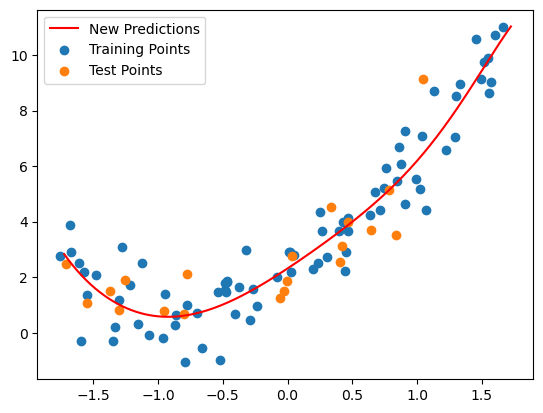

R2 score:  0.7411422099998382


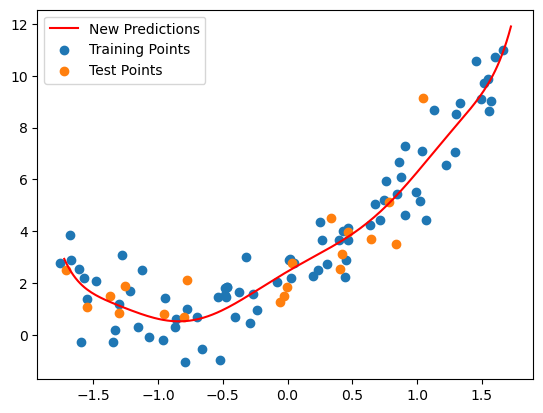

R2 score:  0.7310763879815942


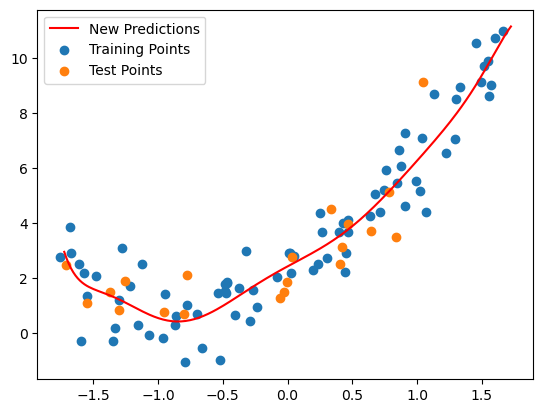

R2 score:  0.7280578621232846


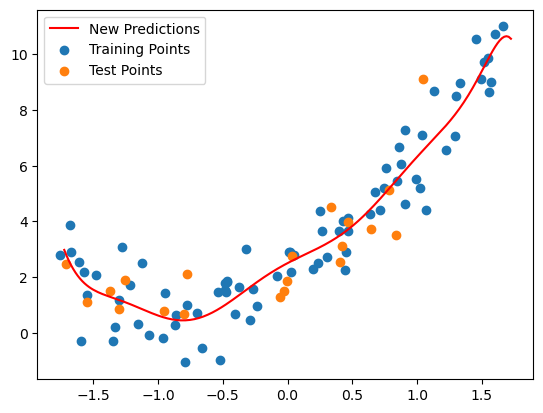

In [131]:
for degree  in [1,2,3,4,5,6,7,8,9,10]:
    poly_regression(degree)
